<a href="https://colab.research.google.com/github/Sarinda251/CAP_4630/blob/master/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HOMEWORK 5**

#1. General concepts

##Artificial Intelligence, Machine Learning, and Deep Learning


Artificial Intelligence (AI), Machine Learning (ML), and Deep Learning (DL) are all subsets of eachother with: DL $\subset$ ML $\subset$ AI



**Artificial Intelligence** is the most generic term which refers to the field of computer science dealing with simulating and imitating intelligent human behaviour 

**Symbolic Artificial Intelligence** or **Good Old-Fashioned Artificial Intelligence (GOFAI)** consists of artificial intelligence methods that are easily interpreted by humans

In general, symbolic AI has a set of rules and an input, which are combined to produce an output. For the example of placing queens on an n by n chessboard, a program written in Prolog, a symbolic AI language simply defines the constraints of the problem (no queens in the same row, column, or diagonal) and the input (number of queens) and shows a boardstate if possible that satisfies the rules.



---



**Machine Learning** is a "field of study that gives computers the ability to learn without being explicitly programmed." - Arthur Samuel (inventor of the term)

It is the process of training a model with a data set to help us make more generalized predictions on newer data

A key feature of machine learning is its ability to keep adapting when you give it more data.

While the standard model of symbolic AI takes in rules and an input to produce an output, machine learning takes an input and a desired output, and comes up with the rules by itself. 

**Supervised Learning** refers to when an intended classification or **label** is provided alongside the data **features** to the model when training. 

In the example below, the MNIST digits data set has a large set of pictures of digits that is acommpanied with a set of corresponding integer labels of the numbers in the pictures. The code segment shows the picture of a 5 with its label underneath.


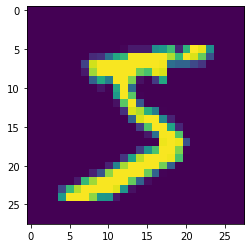

Label: 5


In [3]:
%tensorflow_version 2.x
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(train_images[0])
plt.show()

print("Label: " + str(train_labels[0]))

By giving the model a large set of feature, label pairs, it ideally will learn and modify itself to correcly assign labels to new feature inputs (ie. correctly identify pictures of 5's even if they are written with varying handwriting styles)

**Unsupervised Learning** is the training of a model without any labels in the data set

The model is forced to identify patterns in the data and create its own categorization rules from scratch

This method is mainly used for pattern recognition when a currently observed pattern doesnt exist, or we seek to find any new patterns in the data

**Reinforcement Learning** is another form of Machine Learning that is typically involved with getting computers to do certain tasks (ie. play a game or having a robot walk)

The model in reinfocement learning is known as the **agent** and it is given a situation to avoid (ie. game over screen or falling down)

Every action the agent takes is met with a varying level of reward based on how well it is achieving its goal or how well it is avoiding its loss state. This is combined with its knowledge of its current state to help build a model tha can properly make decisions to complete its task.

---



**Deep Learning** deals with modelling by using algorithms that function similarly to the human brain.

These are known as **artificial neural networks** and they mimic neurons firing in a real brain

#2. Basic concepts 

##Linear Regression

**Linear Regression** is a modelling technique that attempts to describe a linear relationship between a feature and its label

The equation for a linear regression model is $\hat{y} = w_0 + w_1 x_1$

where:

$\hat{y}$ is the predicted label

$w_0$ is the bias term

$w_1$ is the weight of feature 1

$x_1$ is feature 1

for a relationship with n features, more feature and weight terms can be added to the model in the form of $w_i x_i$ up until $w_n x_n$

To **infer** is to predict using the linear model and is done by evaluating the linear function at the desired feature values

The graph below is a linear approximation for some data. It has $w_1 = 5$ and $b = 4$

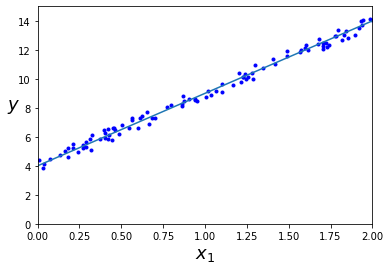

In [18]:
import numpy as np

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 5 * X + (np.random.rand(m, 1)-.5)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

x = np.linspace(0, 2, 50)
y = 5*x + 4

plt.plot(x, y)

plt.show()

##Training Basics

**Training** a model is the process of adjusting the weights and bias of the model to minimize its loss over the set of examples

**Loss** calculated from a function that determines how poor the model predicted the label for a single piece of test data. It is used as negative reinforcement for the model to help it make better predictions.

For example, the loss for the above linear regression example is known as **squared loss**. It is the square distance from each point to the true line. 

Even though there is no line that will make the squared loss of ever point equal zero, the ideal linear regression model will minimize the average loss from all the datapoints known as the **Mean Square Error (MSE)**.

$MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - {y}^{(i)})^2$

The **gradient** of a multivariable function is a vector containing the partial derivatives with respect to its variables. The gradient of the loss function will have a vector with the partial derivatives with respect to each of its weights

$ \nabla L = \begin{bmatrix}{\frac{\partial f}{\partial w_1}} \\ \vdots \\ {\frac{\partial f}{\partial w_n}}\end{bmatrix}$

## Logistic Regression

**Logistic Regression** is a modelling technique that is used when the labels belong to two different categories

The **sigmoid function** is the function $\frac{1}{1+e^{-t}}$. It is used for logistic regression as $y = mx + b$ is used as the base for linear regression.

Below is a sigmoid function

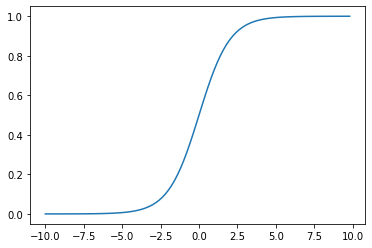

In [19]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.show()

The sigmoid function's range is bounded between 0 and 1, and it's variations are used to determine whether a feature belongs to the label 0 or 1. 

#3. Building a model

A **Convolutional Neural Network** or **CNN** or **ConvNet** is a deep learning algorithm that is used to analyze images, assign different values to parts of the image, and eventually differentiate images into different classifications.

The input to a ConvNet is called the **input feature map**. This is a 3-d matrix consisting of x,y,and colors of the image's pixels. The dimensions in this example can be seen in the *input_shape* in the below code segment.



In [22]:
from keras.applications import MobileNet

conv_base = MobileNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 2s 0us/step


##Importing the data

The following code segments import the database we will work on. It a set of images or either a single cat or a single dog, to train our model to distinguish between the two. 


In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2020-04-25 01:49:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  68.2MB/s    in 1.0s    

2020-04-25 01:49:15 (68.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Creating the model

Models consist of **layers** that each take an input from either the original data or another layer, perform a transformation on that input, and pass an output to either another layer or as the final output of the model.

In this example we will use a **Sequential Model**. This means that each layer forms a chain that is a straight line. Every layer has exactly one preceding layer and one succeding layer, with the only exception being the first and last layers.

As seen earlier with the 

```
input_shape=(150, 150, 3))
```
in our convbase, the first layer must be specified with the shape of its input. Every other layer simply assumes the input shape from the output of the layer before it.


In a **Dense** layer, the first number refers to how many weights that layer is dealing with. The layer with 256 will have 256 weights to tweak and compare, likely responding to groups of pixels in the image and how they look. The layer with 1 will only have 1 output. It is the layer that determines whether the image is a cat or a dog.

**Maxpooling** is a technique in image processing that breaks up an array into square chunks, and then replaces each index in a chunk with the maximum of that chunk. Here, it helps us group up the pixels into more basic units to help analyze trends.

Although not used here, **convolution** is another important technique in image processing. It deals with a kernel matrix that contains a particular transformation. This kernel matrix starts in the top left of the image and slides to the right and then down the rows, applying its transformation to the indexes that it is covering.

**Activations** are an important part of Dense layers as they define what process that layer will use in its calculation. For example, the **sigmoid activation** will calculate a probability using the aforementioned sigmoid function (with its own modification to weights) and determine whether an image is a cat or a dog. The **relu actiavtion** will take the max of each feature and 0, ensuring that there are no negative values.

The last layer of a model is extremely important because it determines what the output of your model will be. 

For example, If your problem is a **binary classification** (one with two different categories, use **sigmoid**. But if it has multiple classes with a single label, use **softmax**

In [0]:
conv_base.trainable = False
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#4. Comping a model

Because models are extremely smart, if a loss function that doesn't match your problem perfectly is used, the model might take shortcuts to minimize loss that you hadn't intended initially.

For the given binary classification problem of dogs and cats, we are using binary crossentrophy loss.

**Optimizers** are how we make use of the information that our loss function gives us to make according changes to our model. The most basic optimizer is gradient descent

To minimize the loss function, we need to find its minimum. We assume that for a well defined loss function, a minimum does exist. At a minimum, the slope of the function is zero, so a method is required to identify where the slope is zero. Even though the slope can also be a maximum, we assume that there is no absolute worst case classifier.

**Gradient Descent** is a technique for finding the minimum possible loss that involves taking the slope (or gradient in higher dimensions) of the function and using it to take steps towards the function's minimum. We assume that the graph of the losses for different weights is an upwards opening parabola, so the slopes of the curve to the left of the vertex are negative, and slops to the right are positive. 

Each step closer is determined by $w_n \leftarrow w_{n-1} - \alpha \nabla L$, where:

The $w$ terms are the tested weights, and $\nabla L$ is the gradient of the loss function.

The **learning rate** $\alpha$ determines how quickly we want to approach the vertex. A large $\alpha$ may overshoot the vertex, while a small one will take too long.


In [0]:
# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

#5. Training a model

Now that we have our data and our model structure, it is time to train. Training a model consists of feeding it data over time and allowing itself to tweak weights to be the best model it can be. 

A common practice for training is to split the initial data into two sets. A training set and a validation set. It is important to have a set of data that the model hasn't seen during testing so you can check on its effectiveness after training. Given enough time, most models will be able to distinguish its test data extremely accurately. The real test is if it has made a model that can be generalized to new data.

If the accuracy of your model during testing is higher than its accuracy on the validation set after testing, your model is likely guilty of **overfitting**. This means that your model has been too closely trained to your test data, and is not generalizable to your problem as a whole.

**Underfitting** is another problem with training in which your model is simply not accurate enough to training data *or* validation data. This is typically remedied with more training, or a tweak in the layer structure.

Below, our model is run through the data set multiple times. Each cycle through the training set is known as an **epoch**.

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 60s 1s/step - loss: 0.2162 - acc: 0.9110 - val_loss: 0.0199 - val_acc: 0.9610
Epoch 2/20
50/50 [==============================] - 59s 1s/step - loss: 0.1842 - acc: 0.9300 - val_loss: 0.2106 - val_acc: 0.9660
Epoch 3/20
50/50 [==============================] - 56s 1s/step - loss: 0.2427 - acc: 0.9110 - val_loss: 0.0360 - val_acc: 0.9630
Epoch 4/20
50/50 [==============================] - 56s 1s/step - loss: 0.1697 - acc: 0.9280 - val_loss: 0.0494 - val_acc: 0.9640
Epoch 5/20
50/50 [==============================] - 56s 1s/step - loss: 0.2236 - acc: 0.9020 - val_loss: 0.0412 - val_acc: 0.9650
Epoch 6/20
50/50 [==============================] - 55s 1s/step - loss: 0.2065 - acc: 0.9170 - val_loss: 0.1837 - val_acc: 0.9670
Epoch 7/20
50/50 [==============================] - 55s 1s/step - loss: 0.2176 - acc: 0.9050 - val_loss: 0.0067 - val_acc: 0.9680
Epoch 

#6. Finetuning a pretrained model (describe how you proceed)

After training is through, it is helpful to plot graphs of the training accuracy alongside the test accuraty, to make sure no over or underfitting is ocurring.

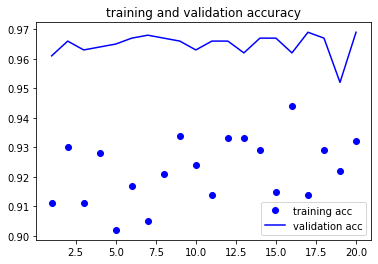

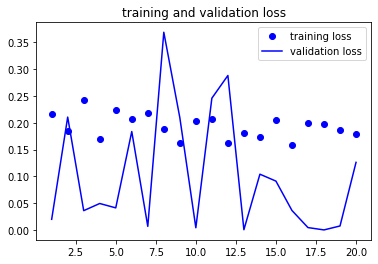

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

Sometimes you want to retrain your model, but not completely. By **freezing** layers, you can control which layers of your model will update based on new training, and which ones will remain the same. This can also help if you want to retrain the last few layers of your model

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

Now that the desired layers have been frozen, you can now retrain the model.

In the example below, the learning rate has been tweaked to be slower. The loss function and optimizer are unchanged. 

In [40]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
50/50 [==============================] - 57s 1s/step - loss: 0.1901 - acc: 0.9220 - val_loss: 0.0777 - val_acc: 0.9590
Epoch 2/20
50/50 [==============================] - 54s 1s/step - loss: 0.1791 - acc: 0.9260 - val_loss: 0.1111 - val_acc: 0.9560
Epoch 3/20
50/50 [==============================] - 54s 1s/step - loss: 0.1425 - acc: 0.9370 - val_loss: 0.0490 - val_acc: 0.9560
Epoch 4/20
50/50 [==============================] - 54s 1s/step - loss: 0.2004 - acc: 0.9220 - val_loss: 0.3138 - val_acc: 0.9560
Epoch 5/20
50/50 [==============================] - 55s 1s/step - loss: 0.1688 - acc: 0.9350 - val_loss: 0.0494 - val_acc: 0.9570
Epoch 6/20
50/50 [==============================] - 54s 1s/step - loss: 0.1672 - acc: 0.9340 - val_loss: 0.0038 - val_acc: 0.9560
Epoch 7/20
50/50 [==============================] - 54s 1s/step - loss: 0.1910 - acc: 0.9260 - val_loss: 0.1387 - val_acc: 0.9550
Epoch 8/20
50/50 [==============================] - 54s 1s/step - loss: 0.1906 - acc: 0.92

Finally, the graphs can be replotted to gague the effectiveness of our fine tuning.

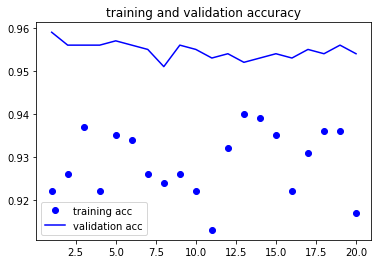

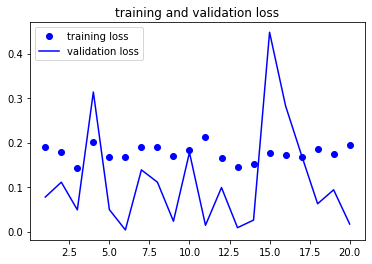

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)

In [43]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.1570131480693817
Validation accuracy: 0.9539999961853027


Our validation accuracy is significantly higher than our training accuracy, so we likely have not overfitted our model, and both are relatively high so we have not underfitted either.

This data was only run for 50 epochs at 20 steps per epoch, so increasing both would likely improve the accuracy of our model, but Colabs is extremely slow right now.